<a href="https://colab.research.google.com/github/Sriharish19/SH-Supervised-ML-Cardiovascular-Risk-Prediction/blob/main/SH_Supervised_ML_Classification_Cardiovascular_Risk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import folium
from folium.plugins import HeatMap
import plotly.express as px
import plotly as plot

pd.set_option('display.max_columns', 20)

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,roc_auc_score,confusion_matrix,precision_recall_curve,auc,classification_report,roc_curve,auc
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import cross_validate

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek

import math

In [2]:
# Mounting Drive
from google.colab import drive
drive.mount('/content/Mydrive')

Mounted at /content/Mydrive


In [3]:
# Reading the CSV file
df = pd.read_csv('/content/Mydrive/MyDrive/Capstone project 4- Cardio vascular risk prediction/data_cardiovascular_risk.csv')

In [4]:
data = df

In [5]:
# Shape
df.shape

(3390, 17)

In [6]:
# Head
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [7]:
#Tail
df.tail()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0
3389,3389,54,3.0,F,NO,0.0,0.0,0,0,0,288.0,124.0,77.0,29.88,79.0,92.0,0


In [8]:
#info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [9]:
# Duplicates
df.duplicated().sum()

0

In [10]:

# Null values
df.isnull().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [11]:
# Replacing 'M' with 1 and 'F' with 0 in 'sex' variable

df['sex'] = df['sex'].apply(lambda x: 1 if x == 'M' else 0)

# Replacing 'YES' with 1 and 'NO' with 0 in 'is_smoking' variable

df['is_smoking'] = df['is_smoking'].apply(lambda x: 1 if x == 'YES' else 0)

In [12]:
# Treating NULL values
# 'education'
df['education'].fillna(0,inplace = True)
df.groupby('education').agg({'age':'mean'})
# print(df.groupby('education').agg({'age':'mean'}))
# From this we can replace education '0' with '1' because based on the age the education varies.
df['education'] = df['education'].apply(lambda x : 1 if x == 0 else x)

# 'cigsPerDay'
df[df['is_smoking'] == 1].groupby('sex').agg({'cigsPerDay':'mean'})
# print(df[df['is_smoking'] == 1].groupby('sex').agg({'cigsPerDay':'mean'}))
# As the average number of cigarettes consumed by Females is 14 and Males is 22
# So replacing null values with 14 for smoking female patients and 22 for smoking male patients.
df.loc[(df.sex == 0) & (df['cigsPerDay'].isna()), 'cigsPerDay'] =  14
df.loc[(df.sex == 1) & (df['cigsPerDay'].isna()), 'cigsPerDay'] =  22

# 'totChol'
df['totChol'].fillna(int(df['totChol'].mean()), inplace = True)

# 'BMI'
df['BMI'].fillna(int(df['BMI'].mean()), inplace = True)

# 'Heart rate'
df['heartRate'].fillna(int(df['heartRate'].mean()), inplace = True)


# 'glucose'
df.groupby('diabetes').agg({'glucose':'mean'})
# print(df.groupby('diabetes').agg({'glucose':'mean'}))
# Average Glucose level of Patients without Diabetes is 79 and with Diabetes is 172
# So replacing null values with 79 for patients without diabetes and 172 for patients with diabetes.
df.loc[ (df.diabetes == 0) & (df['glucose'].isna()), 'glucose'] =  79
df.loc[ (df.diabetes == 1) & (df['glucose'].isna()), 'glucose'] =  172

# 'BPMeds'
df.loc[(df.prevalentHyp == 1) & (df['BPMeds'].isna()), 'BPMeds'] =  1

In [13]:
# Droping the rows with 'BPMeds' as Nan value
df = df.dropna()
df.shape

(3365, 17)

In [14]:
# Summary
round(df.describe([0.95,0.99],include = 'all'),2)

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3365.00,3365.00,3365.00,3365.00,3365.0,3365.00,3365.00,3365.00,3365.00,3365.00,3365.00,3365.00,3365.00,3365.00,3365.00,3365.00,3365.00
mean,1695.31,49.53,1.95,0.43,0.5,9.11,0.04,0.01,0.32,0.03,237.12,132.67,82.93,25.80,75.98,81.92,0.15
std,978.64,8.59,1.02,0.50,0.5,11.85,0.18,0.08,0.47,0.16,44.98,22.34,12.04,4.11,11.99,23.37,0.36
min,0.00,32.00,1.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,107.00,83.50,48.00,15.96,45.00,40.00,0.00
50%,1694.00,49.00,2.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,235.00,128.50,82.00,25.38,75.00,79.00,0.00
95%,3219.80,64.00,4.00,1.00,1.0,30.00,0.00,0.00,1.00,0.00,313.00,175.90,105.00,32.84,98.00,108.00,1.00
99%,3355.36,67.00,4.00,1.00,1.0,43.00,1.00,0.00,1.00,1.00,354.36,202.18,119.36,38.87,110.00,173.00,1.00
max,3389.00,70.00,4.00,1.00,1.0,70.00,1.00,1.00,1.00,1.00,696.00,295.00,142.50,56.80,143.00,394.00,1.00


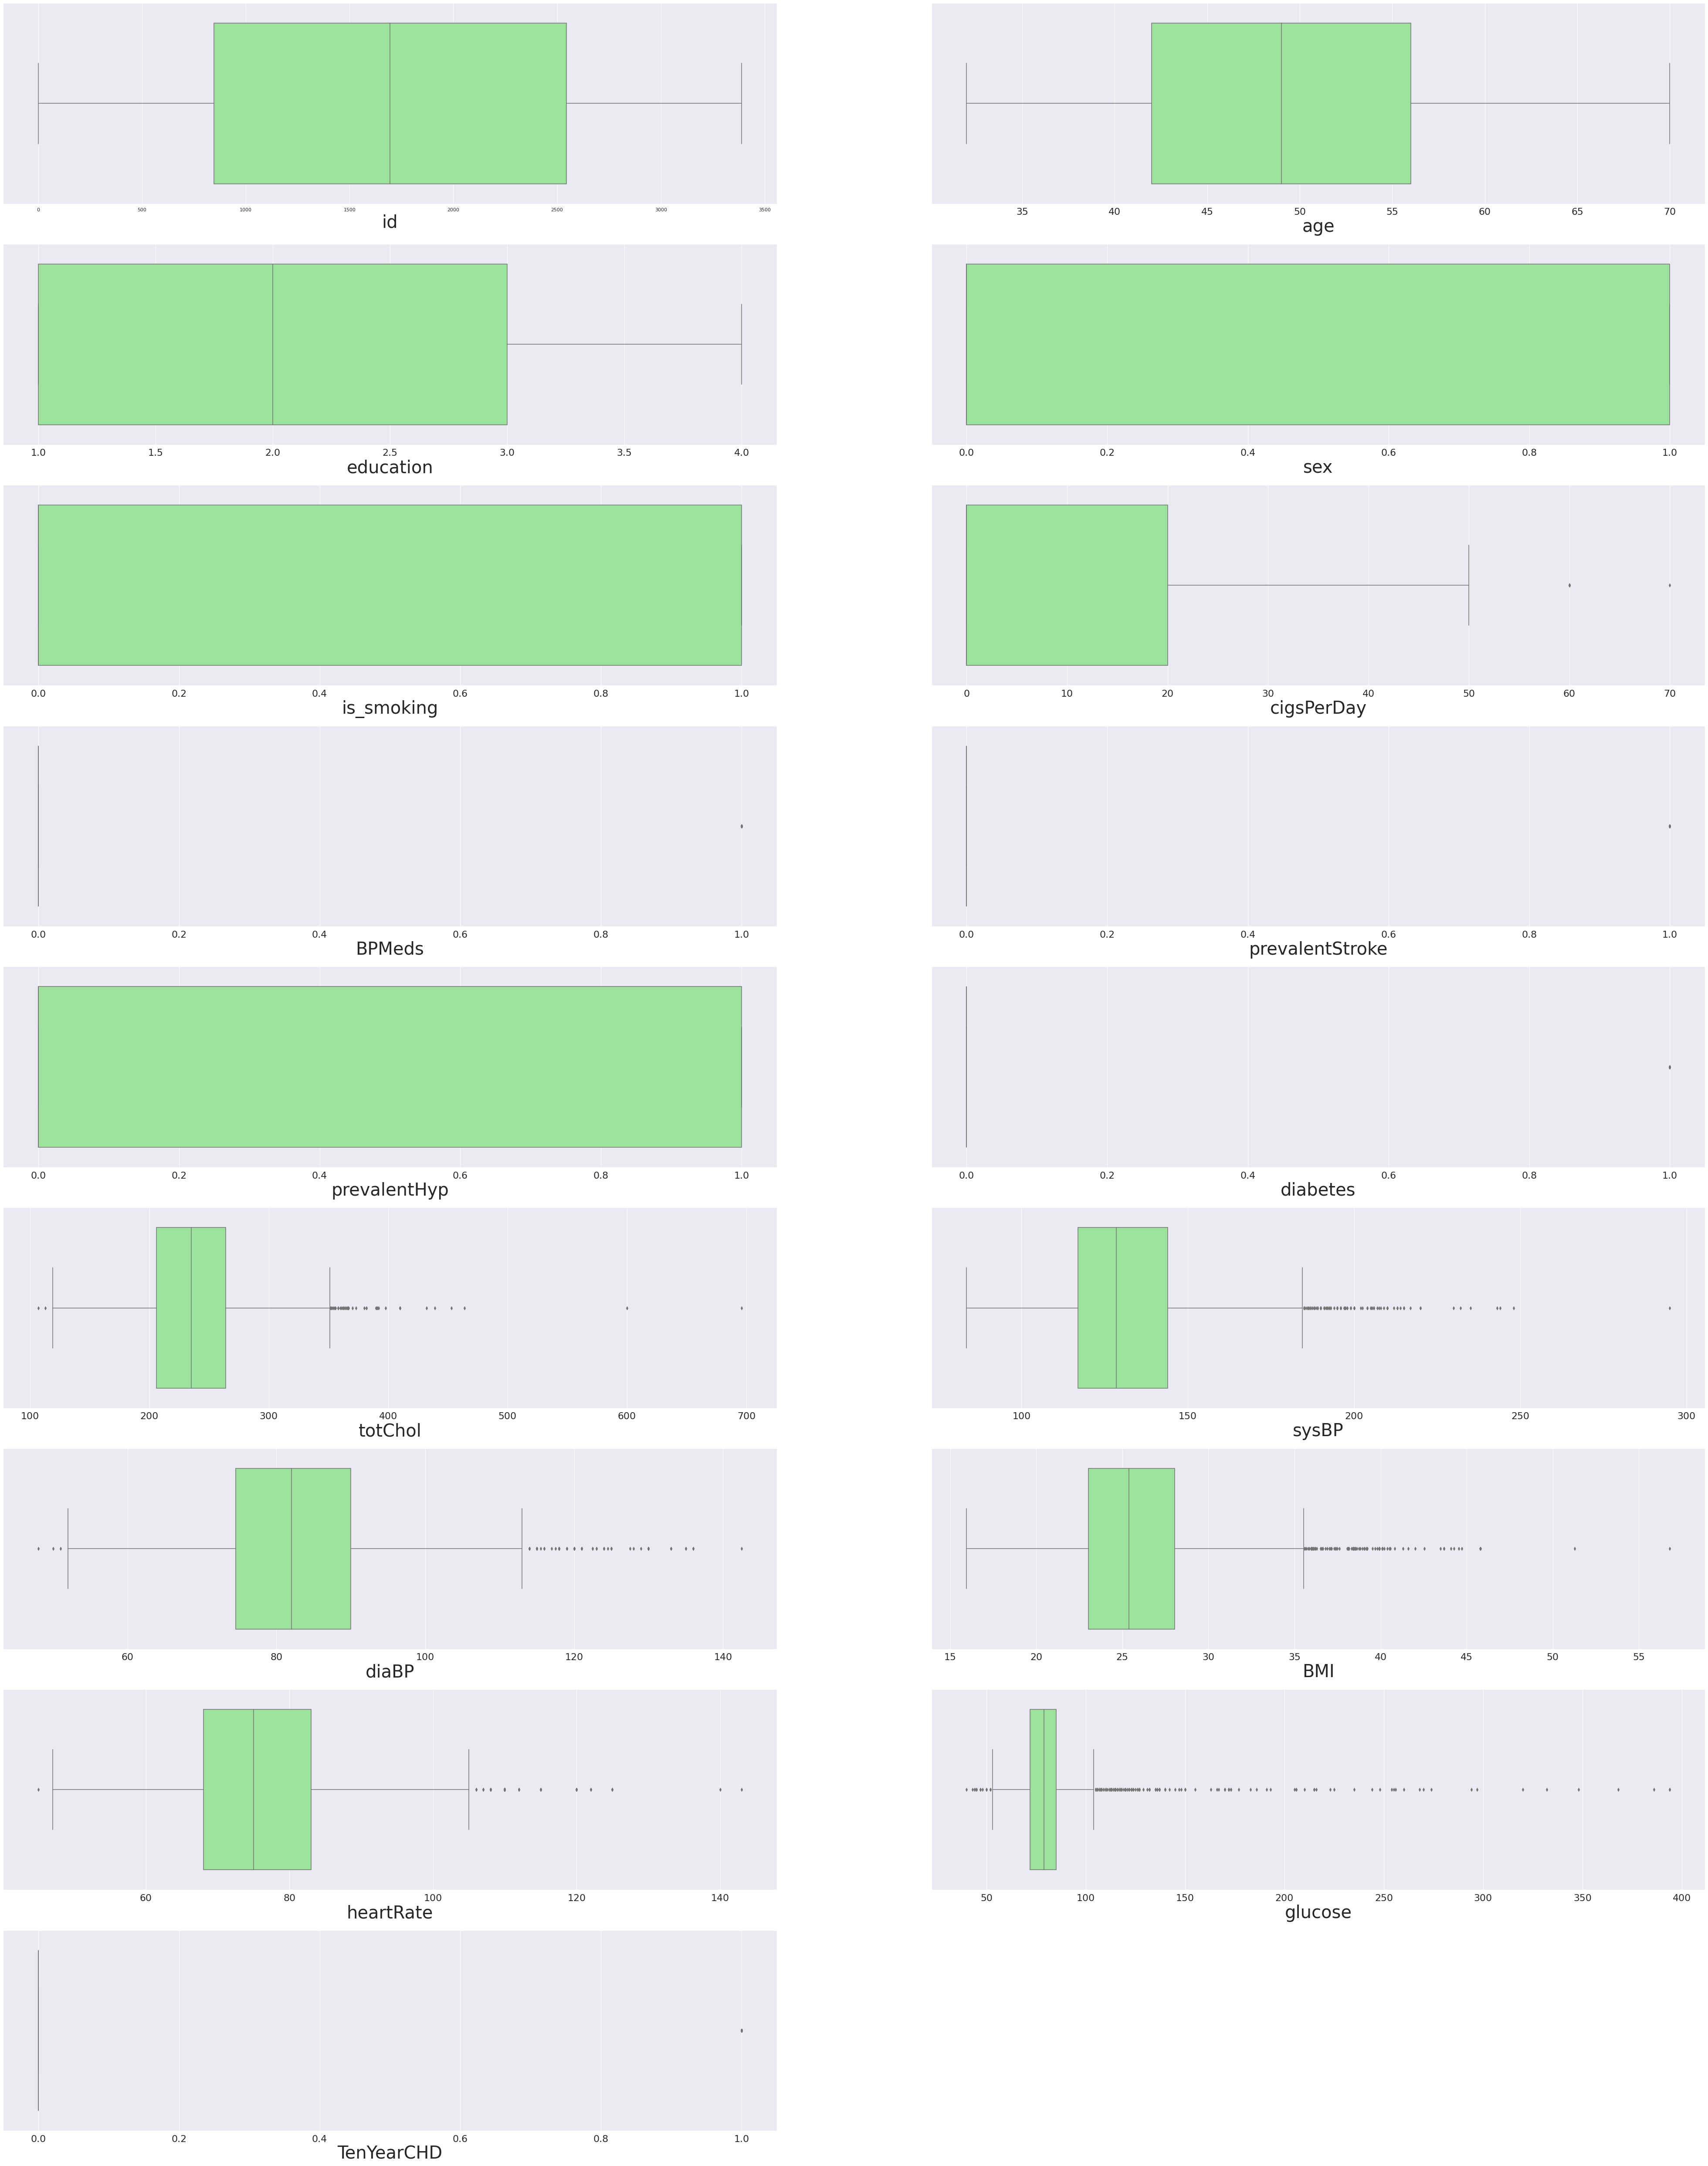

In [15]:
# Box plot to detect outliers

lst_box = df.describe().columns
plt.figure(figsize = (70,100))
sns.set_theme()
for i in enumerate(lst_box):
    plt.subplot(10, 2,i[0]+1)
    sns.set(font_scale = 2)
    sns.boxplot(df[i[1]],color='lightgreen')
    plt.xlabel(i[1],fontsize=40)

In [16]:
# Z Score based technique to remove outliers
lst = ['cigsPerDay','totChol','sysBP','diaBP','BMI','heartRate','glucose']
for i in lst:
  lower_limit = df[i].mean() - 3*df[i].std()
  print(i+'Lower_limit:',round(lower_limit,2))  
  upper_limit = df[i].mean() + 3*df[i].std()
  print(i+'Upper_limit:',round(upper_limit,2))
  df[i] = np.where(df[i]>upper_limit,upper_limit,np.where(df[i]<lower_limit,lower_limit,df[i]))

cigsPerDayLower_limit: -26.46
cigsPerDayUpper_limit: 44.67
totCholLower_limit: 102.2
totCholUpper_limit: 372.05
sysBPLower_limit: 65.66
sysBPUpper_limit: 199.69
diaBPLower_limit: 46.81
diaBPUpper_limit: 119.04
BMILower_limit: 13.48
BMIUpper_limit: 38.12
heartRateLower_limit: 40.02
heartRateUpper_limit: 111.95
glucoseLower_limit: 11.8
glucoseUpper_limit: 152.04


In [17]:
df['totChol'].std()

43.33319340651982

In [19]:
df['totChol'].mean()

236.7919654747848

In [20]:
#columns
df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

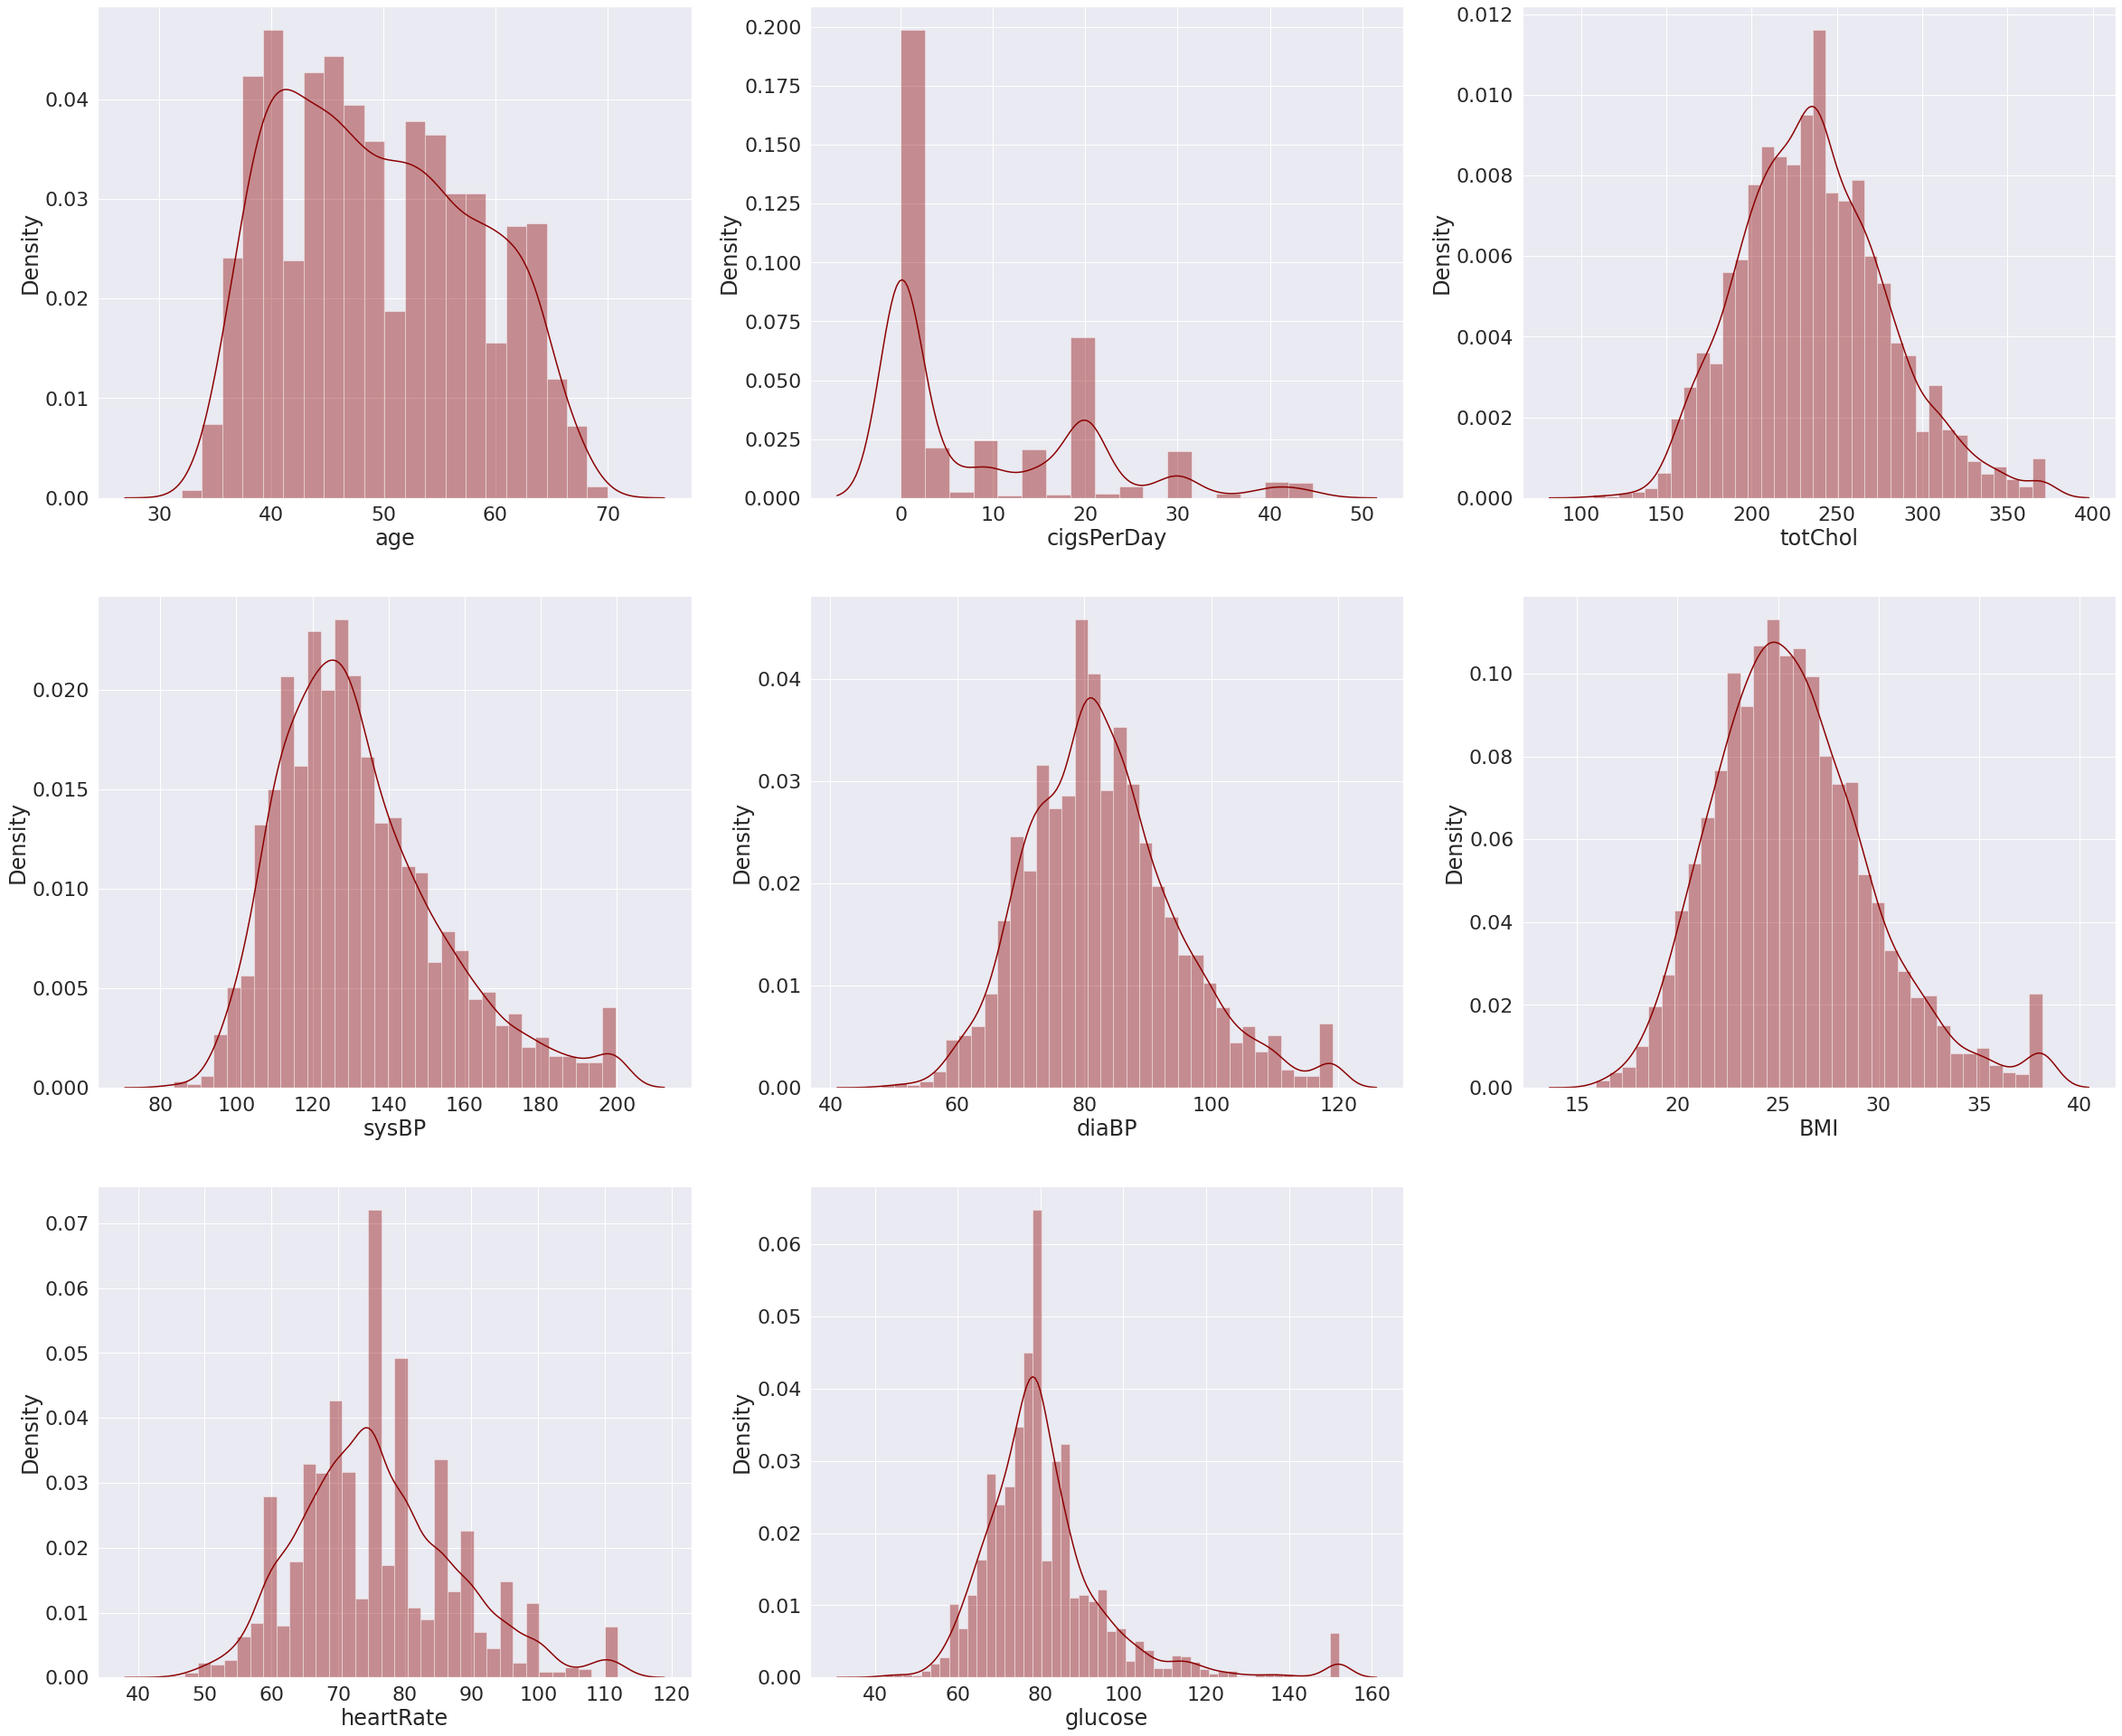

In [21]:
# Distribution plot for numerical variables
lst_dist = ['age','cigsPerDay','totChol', 'sysBP','diaBP', 'BMI', 'heartRate', 'glucose']

plt.figure(figsize = (40,70))
sns.set_theme()
for i in enumerate(lst_dist):
  sns.set(font_scale = 2)
  plt.subplot(6, 3,i[0]+1)
  sns.distplot(df[i[1]],color = 'darkred')

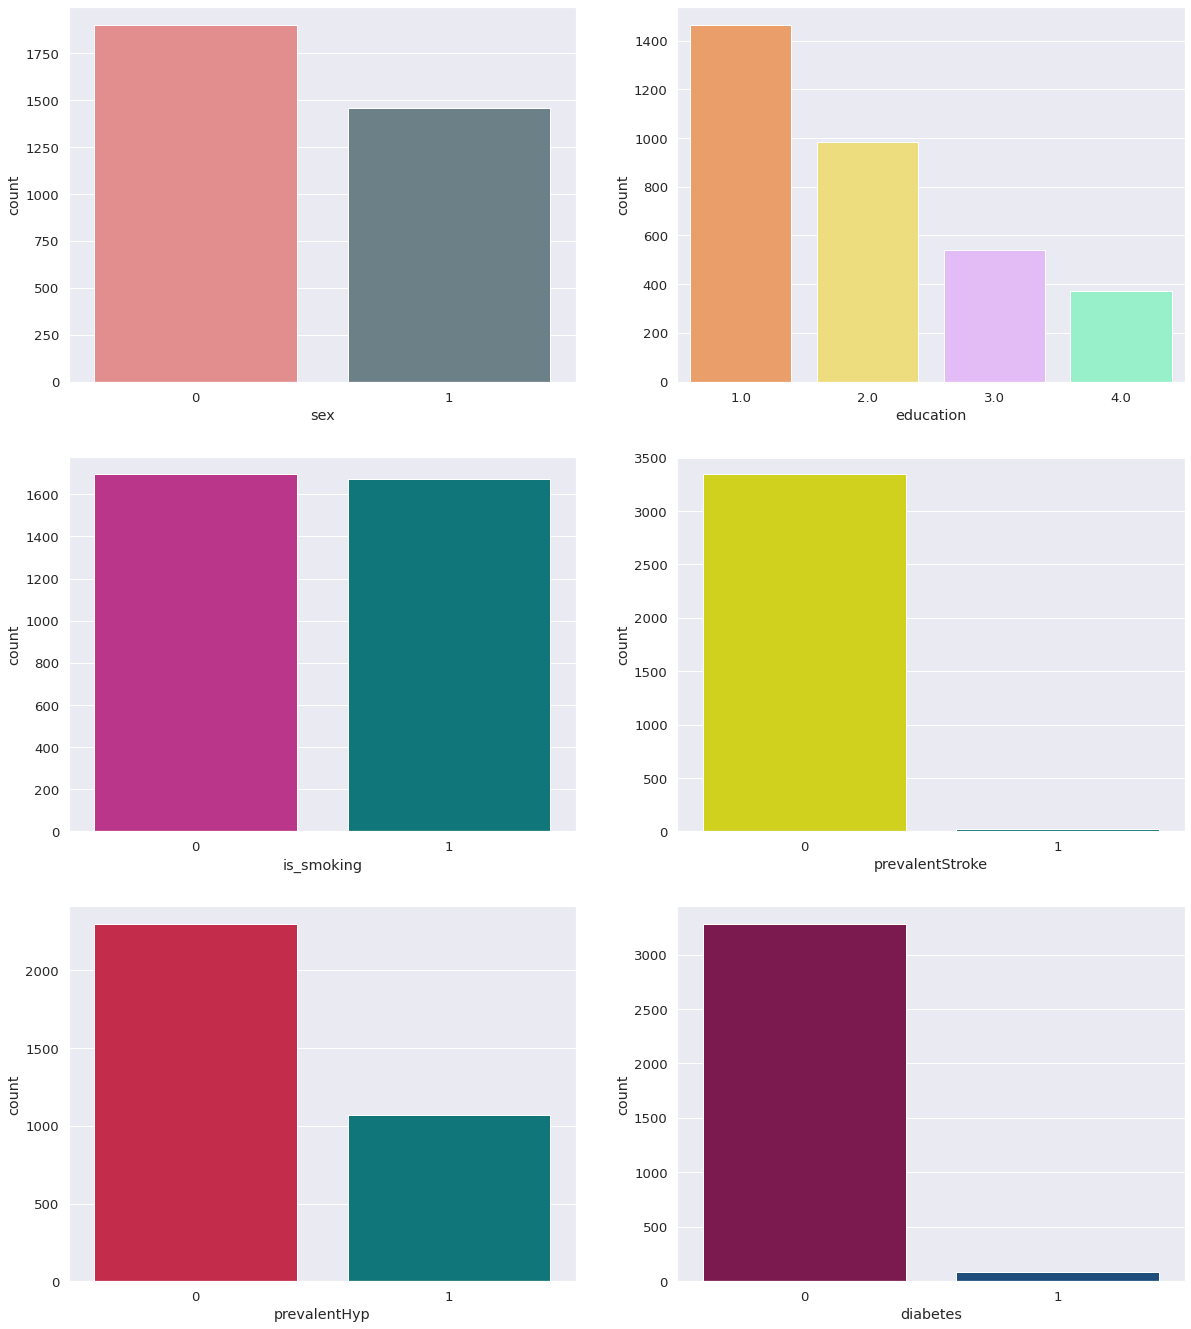

In [22]:
# Value counts Plot
categorical_var_count = ['sex', 'education', 'is_smoking', 'prevalentStroke', 'prevalentHyp', 'diabetes']
plt.figure(figsize = (20,40))
sns.set_theme()
color = [['#F08080','#68838B'],['#ff9a55','#ffea6c','#e7b2ff','#89ffcc'],['#D02090','#00868B'],['#EEEE00','#008080'],['#DC143C','#00868B'],['#8B0A50','#104E8B']]
for i in enumerate(categorical_var_count):
  sns.set(font_scale = 1.2)
  plt.subplot(5, 2,i[0]+1)
  sns.countplot(data = df, x = df[i[1]],palette= color[i[0]])

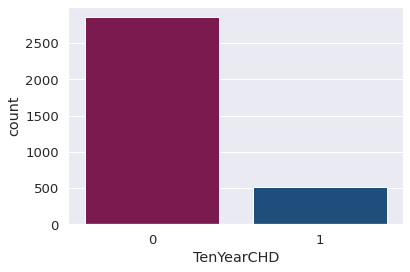

In [23]:
# Count plot for dependent variable
sns.set(font_scale = 1.2)
sns.countplot(data = df, x = 'TenYearCHD',palette= color[i[0]])

Text(0.5, 1.0, 'Education percenatge')

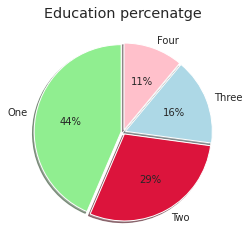

In [26]:
# Pie chart
one,two,three,four = df['education'].value_counts()
total = one+two+three+four
edu_list = [one/total,two/total,three/total,four/total]
plt.pie(edu_list,labels=['One','Two','Three','Four'],colors = ['lightgreen','crimson','lightblue','pink'],
        explode = [0.025,0.025,0.025,0.025],radius=1,startangle=90,textprops={'fontsize': 10},autopct='%0.0f%%',shadow = True)
plt.title('Education percenatge')

Text(0.5, 1.0, 'Cigarattes consumed')

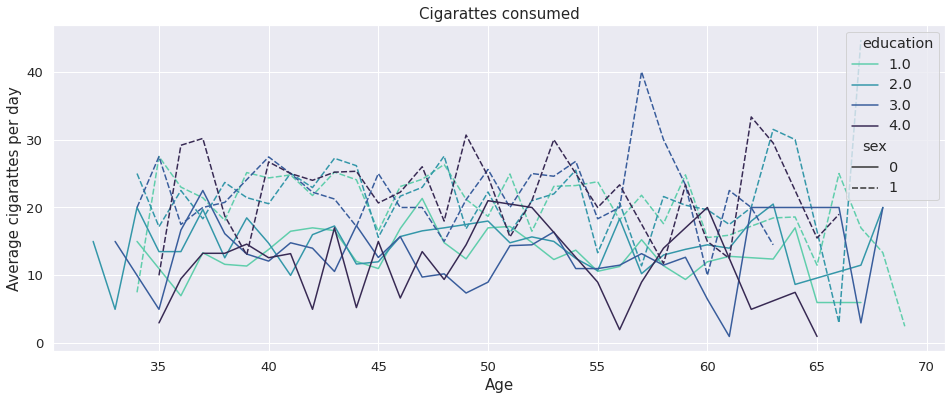

In [27]:
# Line plot for Cigarattes consumed

# Smoking patients are grouped by 'age', 'education', 'sex' to take mean of Cigarettes consumed pre day
df_line_plot = df[df['is_smoking']==1].groupby(['age','education','sex']).agg({'cigsPerDay':'mean'}).reset_index()
# df_line_plot

#Plotting Cigarette per day  for each Age
palette = sns.color_palette("mako_r", 4)
plt.figure(figsize = (16,6))
sns.lineplot(data = df_line_plot, x = 'age', y = 'cigsPerDay',hue = 'education',style = 'sex',palette=palette)
plt.xlabel('Age',fontsize=15)
plt.ylabel('Average cigarattes per day',fontsize=15)
plt.title('Cigarattes consumed',fontsize=15)

In [28]:
# Average of numeric independent variables with dependent variable
# Calculating the differnce in average values of 'col_lst' variables with Smoking and Non Smoking patients.
no_risk_avg_lst = []
risk_avg_lst = []
col_lst = ['totChol','age','cigsPerDay','BMI','sysBP','heartRate','glucose','diaBP']
xticks_lst = ['Total cholesterol level','Age','Cigarette per day','BMI','Systolic blood pressure ','Heart Rate','Glucose',' Diastolic blood pressure']

for col in col_lst:
  no_risk_avg = df[df['TenYearCHD'] == 0].groupby('TenYearCHD').agg({col:'mean'}).reset_index()
  # print(no_risk_avg.iloc[0,1])
  no_risk_avg_lst.append(round(no_risk_avg.iloc[0,1],2))
  risk_avg = df[df['TenYearCHD'] == 1].groupby('TenYearCHD').agg({col:'mean'}).reset_index()
  # print(risk_avg.iloc[0,1])
  risk_avg_lst.append(round(risk_avg.iloc[0,1],2))
# print(no_risk_avg_lst)
# print(risk_avg_lst)

In [29]:
# Function for bar plot
def barplot(bar1_lists,bar2_lists,col_lst,bar1_color,bar2_color,bar1_label,bar2_label,xlabel,ylabel,title,xticks_lst):
  bar1_list = bar1_lists
  bar2_list = bar2_lists

  width_of_RandA_rooms = 0.3
  bar1 = np.arange(len(col_lst))
  bar2 = [i + width_of_RandA_rooms for i in bar1]

  plt.figure(figsize= (13,8))
  plt.bar(bar1,bar1_list,width_of_RandA_rooms,color = bar1_color, label = bar1_label)
  plt.bar(bar2,bar2_list,width_of_RandA_rooms,color = bar2_color, label = bar2_label)
  plt.xlabel(xlabel,fontsize = 15)
  plt.ylabel(ylabel,fontsize = 15)
  plt.title(title,fontsize = 15)
  plt.xticks(bar1+width_of_RandA_rooms/2,xticks_lst,fontsize = 10)
  plt.legend()
  plt.show()

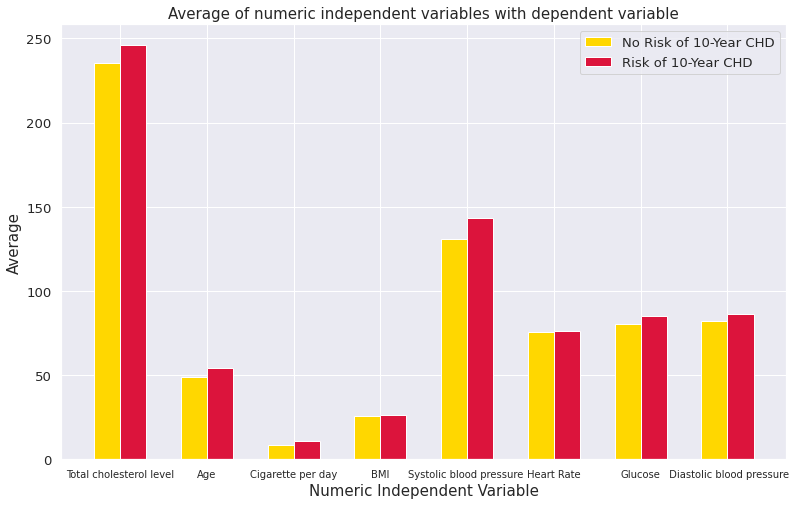

In [30]:
# Plotting
barplot(no_risk_avg_lst,risk_avg_lst,col_lst,'gold','crimson','No Risk of 10-Year CHD','Risk of 10-Year CHD',
        'Numeric Independent Variable','Average','Average of numeric independent variables with dependent variable',xticks_lst)

In [31]:
# Count of Categorical independent variables with dependent variable
# Calculating the differnce in counts of 'col_lsts' variables with Smoking and Non Smoking patients.

no_risk_avg_lsts = []
risk_avg_lsts = []
col_lsts = ['is_smoking','BPMeds','prevalentStroke','prevalentHyp','diabetes']
xticks_lsts = ['Blood Pressure Medication','Is Smoking','Previously had a stroke ','Diabetes','Patient was Hypertensive']

for cols in col_lsts:
  no_risk_avgs = df[df['TenYearCHD'] == 0].groupby('TenYearCHD').agg({cols:'count'}).reset_index()
  # print(no_risk_avgs.iloc[0,1])
  no_risk_avg_lsts.append(round(no_risk_avgs.iloc[0,1],2))
  risk_avgs= df[df['TenYearCHD'] == 1].groupby('TenYearCHD').agg({cols:'count'}).reset_index()
  # print(risk_avgs.iloc[0,1])
  risk_avg_lsts.append(round(risk_avgs.iloc[0,1],2))
# print(no_risk_avg_lsts)
# print(risk_avg_lsts)

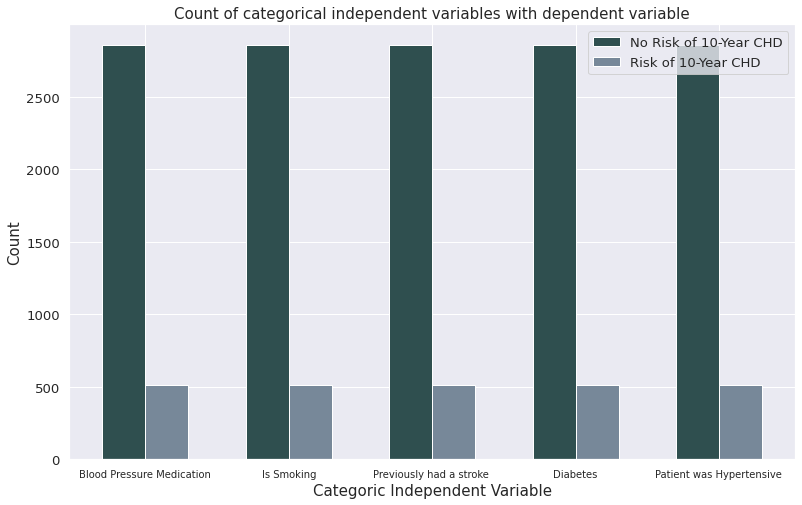

In [32]:
# Plotting
barplot(no_risk_avg_lsts,risk_avg_lsts,col_lsts,'darkslategray','lightslategray','No Risk of 10-Year CHD',
        'Risk of 10-Year CHD','Categoric Independent Variable','Count','Count of categorical independent variables with dependent variable',xticks_lsts)

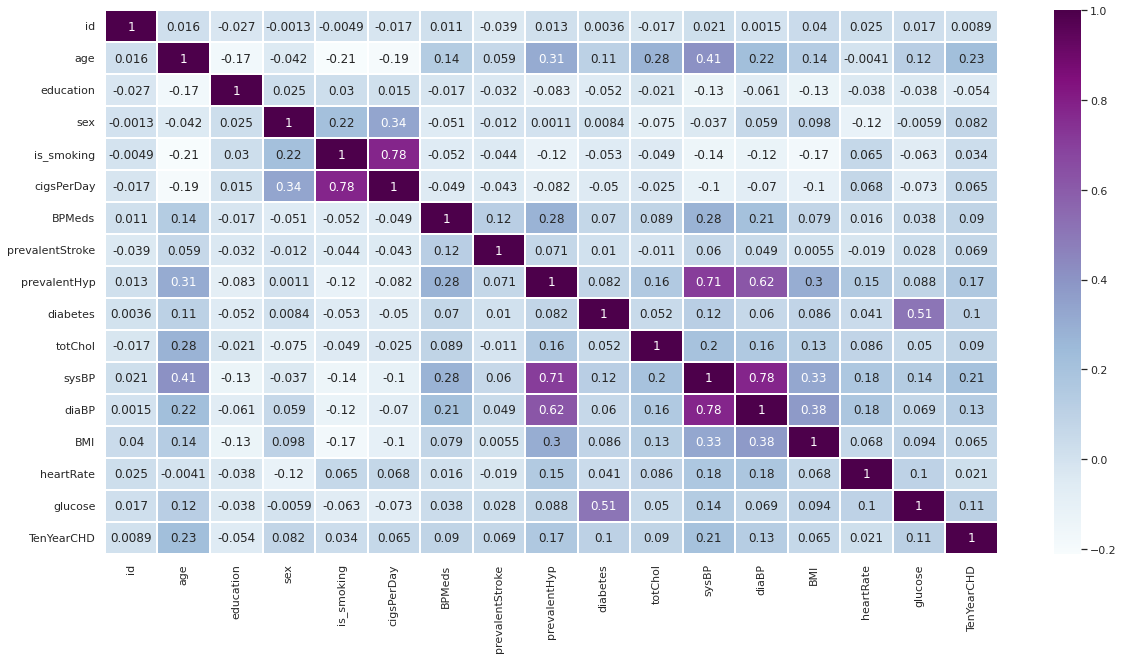

In [33]:
# Multicolinearity

plt.figure(figsize = (20, 10))
df_co_relation = df.corr()
# print(df_co_relation)
sns.set(font_scale = 1)
sns.heatmap(df_co_relation, annot = True, linewidths = 1,cmap = 'BuPu')
plt.show()

In [34]:
# Varinace Inflation Factor
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [35]:
calc_vif(df[[i for i in df.describe().columns if i not in ['id','TenYearCHD']]])

,variables,VIF
0,age,42.666037
1,education,4.615340
2,sex,2.155686
3,is_smoking,5.200391
4,cigsPerDay,4.519465
5,BPMeds,1.162028
6,prevalentStroke,1.029232
7,prevalentHyp,2.507379
8,diabetes,1.337928
9,totChol,33.478899


In [36]:
# Creating instances for Independent and Dependent variables
independent_variables = df.columns.tolist()
independent_variables.remove('id')
independent_variables.remove('TenYearCHD')

dependent_variable = ['TenYearCHD']

print('Independent variables : ',independent_variables)
print('Dependent variables   : ',dependent_variable)

Independent variables :  ['age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
Dependent variables   :  ['TenYearCHD']


In [37]:
# Train test split
X = df[independent_variables].values
y = df[dependent_variable].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
print('X_train :',X_train.shape)
print('X_test  :',X_test.shape)
print('y_train :',y_train.shape)
print('y_test  :',y_test.shape)

X_train : (2523, 15)
X_test  : (842, 15)
y_train : (2523, 1)
y_test  : (842, 1)


In [38]:
# Transforming data

# Standardization
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

In [39]:
# Logistic Regression
# Creating an instance of Logistic Regression
logistic = LogisticRegression(fit_intercept = True)

# Hyperparameters
grid = {'C':10.0**np.arange(-2,3),'penalty':['l1','l2']}

# KFold
cv = KFold(n_splits = 5, random_state = None, shuffle = False)

# Grid Search
clf = GridSearchCV(logistic,grid,cv = cv,n_jobs = -1,scoring = 'f1_macro')

In [40]:
# Model fit
clf.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'penalty': ['l1', 'l2']},
             scoring='f1_macro')

In [41]:
# Get the predicted probabilities
train_proba_preds = clf.predict_proba(X_train)[:,1]
test_proba_preds = clf.predict_proba(X_test)[:,1]

In [42]:
# Get the predicted classes
train_class_preds = clf.predict(X_train)
test_class_preds = clf.predict(X_test)

In [43]:
# Function for Accuracy scores
def accuracy_scoress(actual_train,predicted_train,actual_test,predicted_test):
  train_accuracy = (accuracy_score(actual_train,predicted_train))*100
  test_accuracy = (accuracy_score(actual_test,predicted_test))*100

  print("The accuracy on train data is :", round(train_accuracy,5))
  print("The accuracy on test data is  :", round(test_accuracy,5))

In [44]:
# Get the accuracy scores
accuracy_scoress(y_train,train_class_preds,y_test,test_class_preds)

The accuracy on train data is : 85.73127
The accuracy on test data is  : 85.03563


In [45]:
# Here the accuracy score may be good. But for the imbalanced dataset ROC AUC score would be the appropriate metric

In [46]:
# Function for evaluation
def evaluation(actual_train,predicted_train_prob,actual_test,predicted_test_prob,predicted_train,predicted_test):
  # Get the 'ROC AUC' and 'Precision Recall' scores

  # ROC AUC
  train_roc_auc_score = roc_auc_score(actual_train,predicted_train_prob)
  test_roc_auc_score = roc_auc_score(actual_test,predicted_test_prob)

  print("The ROC AUC score on train data is          :", round(train_roc_auc_score,5))
  print("The ROC AUC score on test data is           :", round(test_roc_auc_score,5))

  # Precision Recall curve

  precision_train, recall_train,_train = precision_recall_curve(actual_train,predicted_train_prob)
  precision, recall,_ = precision_recall_curve(actual_test,predicted_test_prob)
    
  # print(_)
  auc_score_train = auc(recall_train, precision_train)
  auc_score = auc(recall, precision)
  print("The Precision Recall score on train data is :", round(auc_score_train,5))
  print("The Precision Recall score on test data is  :", round(auc_score,5))

  # Classification Report
  print(classification_report(actual_test,predicted_test))


  # Presicion Recall curve

  # plotting    
  plt.figure(figsize=(10,7))
  plt.plot(precision, recall, linestyle='--',color='crimson',label = ((f'Class 1, AUC= {round(auc_score,5)}')))
  plt.title('Presicion Recall curve')
  plt.xlabel('Recall')
  plt.ylabel('Presicion')
  plt.legend(loc='best')


The ROC AUC score on train data is          : 0.72941
The ROC AUC score on test data is           : 0.73401
The Precision Recall score on train data is : 0.33345
The Precision Recall score on test data is  : 0.39415
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       706
           1       0.86      0.09      0.16       136

    accuracy                           0.85       842
   macro avg       0.85      0.54      0.54       842
weighted avg       0.85      0.85      0.80       842



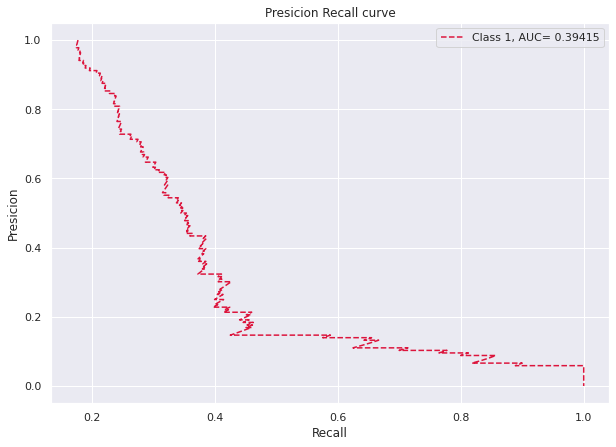

In [47]:
# Evaluation 
evaluation(y_train,train_proba_preds,y_test,test_proba_preds,train_class_preds,test_class_preds)

In [48]:
# Function for confusion matrix
def conf_mat(actual_train,predicted_train,actual_test,predicted_test):
    # Confusion matrix for train and test datasets.

  plt.figure(figsize = (10,20))
  sns.set_theme()
  var_lsts= [actual_train,predicted_train,actual_test,predicted_test]

  for var in enumerate(var_lsts):
    if var[0] == 0:
      ax  = plt.subplot(5,2,1)
      cm = confusion_matrix(var_lsts[var[0]],var_lsts[var[0] +1])
      print('Train Confusion Matrix :')
      print(cm)
      sns.heatmap(cm, annot=True,ax = ax,cmap="Blues") #annot=True to annotate cells
      labels = ['no risk of CHD', 'risk of CHD']
      ax.set_xlabel('Predicted labels')
      ax.set_ylabel('True labels')
      ax.set_title('Confusion Matrix of Train dataset')
      ax.xaxis.set_ticklabels(labels)
      ax.yaxis.set_ticklabels(labels)
      sns.set(font_scale = 1)
    elif var[0] == 2:
      ax = plt.subplot(5,2,2)
      cm = confusion_matrix(var_lsts[var[0]],var_lsts[var[0] +1])
      print('Test Confusion Matrix :')
      print(cm)
      sns.heatmap(cm, annot=True,cmap="BuPu") #annot=True to annotate cells
      labels = ['no risk of CHD', 'risk of CHD']
      ax.set_xlabel('Predicted labels')
      ax.set_ylabel('True labels')
      ax.set_title('Confusion Matrix of Test dataset')
      ax.xaxis.set_ticklabels(labels)
      ax.yaxis.set_ticklabels(labels)
      sns.set(font_scale = 1)

Train Confusion Matrix :
[[2141    9]
 [ 351   22]]
Test Confusion Matrix :
[[704   2]
 [124  12]]


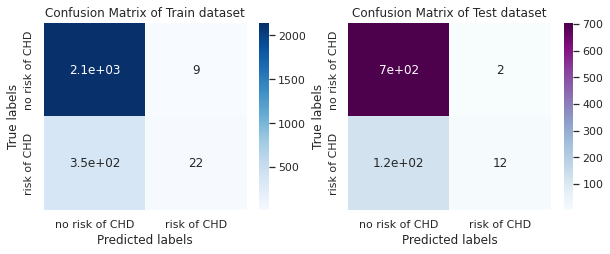

In [49]:
# Confusion Matrix
conf_mat(y_train,train_class_preds,y_test, test_class_preds)

In [50]:
# Observations from Confusion Matrix of test dataset
# True Negative(TN) = Persons who dont have a risk of 10-year CHD, and our model predicted that they dont have a risk of 10-year CHD.
# True Positive(TP) = Persons who have a risk of 10-year CHD, and our model predicted that they have a risk of 10-year CHD.
# False Negative(FN) = Persons who have a risk of 10-year CHD, and our model predicted that they dont have a risk of 10-year CHD.
# False Positive(FP) = Persons who dont have a risk of 10-year CHD, and our model predicted that they have a risk of 10-year CHD.
cm = confusion_matrix(y_test,test_class_preds)
print('True Negative  :',cm[0][0])
print('False Positive :',cm[0][1])
print('False Negative :',cm[1][0])
print('True Positive  :',cm[1][1])
# Precision - shows how correct the model is, when it predicts that a person has a risk of 10-year CHD.
Precision = (cm[1][1]/(cm[1][1]+cm[0][1])) *100
print('Precision      :',round(Precision,1),'%')
# 
# Recall - for all presons who have a risk of 10-year CHD, how many the model have correctly predicted as having a risk of 10-year CHD.
Recall = (cm[1][1]/(cm[1][1]+cm[1][0])) *100
print('Recall         :',round(Recall,1),'%')

True Negative  : 704
False Positive : 2
False Negative : 124
True Positive  : 12
Precision      : 85.7 %
Recall         : 8.8 %
